In [1]:
# TODO: grid search
# TODO: NB

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [3]:
s_df = pd.read_csv('./statistics_posts.csv')
ds_df = pd.read_csv('./datascience_posts.csv')

In [4]:
s_df.head()

,selftext,title,id,sorted_by,num_comments,score,ups,downs
0,NaN,The trump problem,7h23he,top,34,471,471,0
1,NaN,Bing results. Where stats and fashion meet.,7dopht,top,4,303,303,0
2,NaN,RIP Hans Rosling - a tribute to the legend,5smcqw,top,15,292,292,0
3,NaN,The scariest Halloween monster of them all!,7aqv39,top,29,276,276,0
4,NaN,Statisticians Found One Thing They Can Agree O...,49dc8t,top,87,259,259,0


In [5]:
ds_df.head()

,selftext,title,id,sorted_by,num_comments,score,ups,downs
0,TL;DR: learned a buncha shit in 20 months with...,How I went from no coding or machine learning ...,713hnw,top,110.0,627.0,627.0,0.0
1,NaN,Data science recruiters,8nl2ps,top,49.0,616.0,616.0,0.0
2,NaN,Data Scientist: \'dādə ˈsīən(t)əst\ (n.),8hxnk9,top,46.0,583.0,583.0,0.0
3,NaN,newbies be like,80rhvh,top,145.0,509.0,509.0,0.0
4,NaN,Google Introduces New Search Engine for Findin...,9dcltp,top,16.0,470.0,470.0,0.0


## EDA

In [6]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
selftext        343 non-null object
title           997 non-null object
id              997 non-null object
sorted_by       997 non-null object
num_comments    997 non-null int64
score           997 non-null int64
ups             997 non-null int64
downs           997 non-null int64
dtypes: int64(4), object(4)
memory usage: 62.4+ KB


In [7]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
selftext        473 non-null object
title           997 non-null object
id              997 non-null object
sorted_by       997 non-null object
num_comments    997 non-null float64
score           997 non-null float64
ups             997 non-null float64
downs           997 non-null float64
dtypes: float64(4), object(4)
memory usage: 62.4+ KB


In [8]:
s_df['comments_score'] = s_df['num_comments'] * s_df['score']
ds_df['comments_score'] = ds_df['num_comments'] * ds_df['score']

In [9]:
s_df.describe()

,num_comments,score,ups,downs,comments_score
count,997.000000,997.000000,997.000000,997.0,997.000000
mean,19.162487,54.568706,54.568706,0.0,1191.278837
std,22.167935,37.594894,37.594894,0.0,2175.510716
min,0.000000,26.000000,26.000000,0.0,0.000000
25%,5.000000,33.000000,33.000000,0.0,210.000000
50%,12.000000,43.000000,43.000000,0.0,580.000000
75%,26.000000,62.000000,62.000000,0.0,1323.000000
max,230.000000,471.000000,471.000000,0.0,26226.000000


In [10]:
ds_df.describe()

,num_comments,score,ups,downs,comments_score
count,997.000000,997.000000,997.000000,997.0,997.000000
mean,22.398195,75.761284,75.761284,0.0,2147.405216
std,25.707087,65.695073,65.695073,0.0,4914.626615
min,0.000000,29.000000,29.000000,0.0,0.000000
25%,6.000000,40.000000,40.000000,0.0,315.000000
50%,14.000000,54.000000,54.000000,0.0,819.000000
75%,29.000000,84.000000,84.000000,0.0,1995.000000
max,212.000000,627.000000,627.000000,0.0,73805.000000


In [11]:
s_df.drop('downs', axis=1, inplace=True)

In [12]:
s_df.head()

,selftext,title,id,sorted_by,num_comments,score,ups,comments_score
0,NaN,The trump problem,7h23he,top,34,471,471,16014
1,NaN,Bing results. Where stats and fashion meet.,7dopht,top,4,303,303,1212
2,NaN,RIP Hans Rosling - a tribute to the legend,5smcqw,top,15,292,292,4380
3,NaN,The scariest Halloween monster of them all!,7aqv39,top,29,276,276,8004
4,NaN,Statisticians Found One Thing They Can Agree O...,49dc8t,top,87,259,259,22533


In [13]:
ds_df.drop('downs', axis=1, inplace=True)

In [14]:
ds_df.head()

,selftext,title,id,sorted_by,num_comments,score,ups,comments_score
0,TL;DR: learned a buncha shit in 20 months with...,How I went from no coding or machine learning ...,713hnw,top,110.0,627.0,627.0,68970.0
1,NaN,Data science recruiters,8nl2ps,top,49.0,616.0,616.0,30184.0
2,NaN,Data Scientist: \'dādə ˈsīən(t)əst\ (n.),8hxnk9,top,46.0,583.0,583.0,26818.0
3,NaN,newbies be like,80rhvh,top,145.0,509.0,509.0,73805.0
4,NaN,Google Introduces New Search Engine for Findin...,9dcltp,top,16.0,470.0,470.0,7520.0


## Creating Targets

In [15]:
# Set the statistics subreddit to be positive when classifying subreddits.
s_df['subreddit_classifier'] = 1
ds_df['subreddit_classifier'] = 0

In [16]:
s_df['selftext'].fillna('', inplace=True)
s_df['title_body'] = s_df['title'] + s_df['selftext']

s_df['good_score'] = 0
s_df.loc[s_df['score'] > 43, 'good_score'] = 1

s_df['good_comments'] = 0
s_df.loc[s_df['num_comments'] > 12, 'good_comments'] = 1

s_df['good_com_score'] = 0
s_df.loc[s_df['comments_score'] > 580, 'good_com_score'] = 1

In [17]:
ds_df['selftext'].fillna('', inplace=True)
ds_df['title_body'] = ds_df['title'] + ds_df['selftext']

ds_df['good_score'] = 0
ds_df.loc[ds_df['score'] > 54, 'good_score'] = 1

ds_df['good_comments'] = 0
ds_df.loc[ds_df['num_comments'] > 14, 'good_comments'] = 1

ds_df['good_com_score'] = 0
ds_df.loc[ds_df['comments_score'] > 819, 'good_com_score'] = 1

## Combining Data

In [18]:
all_data = pd.concat([s_df, ds_df], sort = False)

In [19]:
all_data.describe()

,num_comments,score,ups,comments_score,subreddit_classifier,good_score,good_comments,good_com_score
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,20.780341,65.164995,65.164995,1669.342026,0.500000,0.495486,0.496489,0.499498
std,24.051310,54.548232,54.548232,3829.440291,0.500125,0.500105,0.500113,0.500125
min,0.000000,26.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,36.000000,36.000000,256.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,49.000000,49.000000,687.000000,0.500000,0.000000,0.000000,0.000000
75%,27.000000,71.000000,71.000000,1656.000000,1.000000,1.000000,1.000000,1.000000
max,230.000000,627.000000,627.000000,73805.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
all_data.head()

,selftext,title,id,sorted_by,num_comments,score,ups,comments_score,subreddit_classifier,title_body,good_score,good_comments,good_com_score
0,,The trump problem,7h23he,top,34.0,471.0,471.0,16014.0,1,The trump problem,1,1,1
1,,Bing results. Where stats and fashion meet.,7dopht,top,4.0,303.0,303.0,1212.0,1,Bing results. Where stats and fashion meet.,1,0,1
2,,RIP Hans Rosling - a tribute to the legend,5smcqw,top,15.0,292.0,292.0,4380.0,1,RIP Hans Rosling - a tribute to the legend,1,1,1
3,,The scariest Halloween monster of them all!,7aqv39,top,29.0,276.0,276.0,8004.0,1,The scariest Halloween monster of them all!,1,1,1
4,,Statisticians Found One Thing They Can Agree O...,49dc8t,top,87.0,259.0,259.0,22533.0,1,Statisticians Found One Thing They Can Agree O...,1,1,1


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 996
Data columns (total 13 columns):
selftext                1994 non-null object
title                   1994 non-null object
id                      1994 non-null object
sorted_by               1994 non-null object
num_comments            1994 non-null float64
score                   1994 non-null float64
ups                     1994 non-null float64
comments_score          1994 non-null float64
subreddit_classifier    1994 non-null int64
title_body              1994 non-null object
good_score              1994 non-null int64
good_comments           1994 non-null int64
good_com_score          1994 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 218.1+ KB


/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


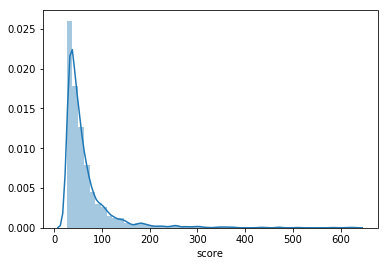

In [113]:
sns.distplot(all_data['score'])

In [111]:
all_data[all_data['score'] > 200].shape[0]

55

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


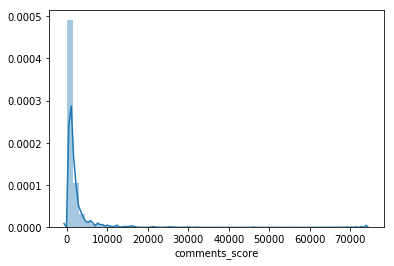

In [123]:
sns.distplot(all_data['comments_score'])

In [124]:
all_data[all_data['comments_score'] > 10000].shape

(51, 13)

## Baseline

In [22]:
all_data['subreddit_classifier'].mean()

0.5

## Count Vectorizer

In [23]:
X = all_data['title']
y = all_data['subreddit_classifier']

In [24]:
cvec = CountVectorizer(stop_words='english')
data = cvec.fit_transform(X)
cvec_df = pd.DataFrame(data.toarray(), columns=cvec.get_feature_names())

In [25]:
cvec_X = cvec_df
X_train, X_test, y_train, y_test = train_test_split(cvec_X, y, random_state=42, stratify=y)

In [26]:
print(y_train.mean(), y_test.mean())

0.5003344481605351 0.49899799599198397


## Count Vectorization with 1000 Max Features

In [27]:
adj_cvec = CountVectorizer(stop_words='english', max_features=1000)
adj_data = adj_cvec.fit_transform(X)
adj_cvec_df = pd.DataFrame(adj_data.toarray(), columns=adj_cvec.get_feature_names())

In [28]:
adj_X = adj_cvec_df
adj_X_train, adj_X_test, adj_y_train, adj_y_test = train_test_split(adj_X, y, random_state=42, stratify=y)

In [29]:
print(adj_y_train.mean(), adj_y_test.mean())

0.5003344481605351 0.49899799599198397


## Count Vectorization Using Bigrams

In [30]:
ng_cvec = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
ng_data = ng_cvec.fit_transform(X)
ng_cvec_df = pd.DataFrame(ng_data.toarray(), columns=ng_cvec.get_feature_names())

In [31]:
ng_X = ng_cvec_df
ng_X_train, ng_X_test, ng_y_train, ng_y_test = train_test_split(ng_X, y, random_state=42, stratify=y)

In [32]:
print(ng_y_train.mean(), ng_y_test.mean())

0.5003344481605351 0.49899799599198397


## Random Forest Using First Count Vectorization

In [33]:
randy = RandomForestClassifier(n_estimators=100)
randy.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
randy.score(X_test, y_test)

0.8156312625250501

## Random Forest Using Max Features Count Vectorization

In [35]:
adj_randy = RandomForestClassifier(n_estimators=100)
adj_randy.fit(adj_X_train, adj_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
adj_randy.score(adj_X_test, adj_y_test)

0.8296593186372746

## Random Forest Using Bigrams Count Vectorization

In [37]:
ng_randy = RandomForestClassifier(n_estimators=100)
ng_randy.fit(ng_X_train, ng_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
ng_randy.score(ng_X_test, ng_y_test)

0.7434869739478958

## Logistic Regression Using First Count Vectorization

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8276553106212425

## Logistic Regression Using Max Features Count Vectorization

In [40]:
logreg = LogisticRegression()
logreg.fit(adj_X_train, adj_y_train)
logreg.score(adj_X_test, adj_y_test)

0.8216432865731463

## Logistic Regression Using Bigrams Count Vectorization

In [41]:
logreg = LogisticRegression()
logreg.fit(ng_X_train, ng_y_train)
logreg.score(ng_X_test, ng_y_test)

0.7555110220440882

## TF-IDF

In [42]:
X = all_data['title']
y = all_data['subreddit_classifier']

In [43]:
tvec = TfidfVectorizer(stop_words='english')
tvec_data = tvec.fit_transform(X)
tvec_df = pd.DataFrame(tvec_data.toarray(), columns=tvec.get_feature_names())

In [44]:
tvec_X = tvec_df
X_train_tvec, X_test_tvec, y_train_tvec, y_test_tvec = train_test_split(tvec_X, y, random_state=42, stratify=y) 

## TF-IDF with 1000 Max Features

In [45]:
adj_tvec = TfidfVectorizer(stop_words='english', max_features=1000)
adj_tvec_data = adj_tvec.fit_transform(X)
adj_tvec_df = pd.DataFrame(adj_tvec_data.toarray(), columns=adj_tvec.get_feature_names())

In [46]:
adj_tvec_X = adj_tvec_df
adj_X_train_tvec, adj_X_test_tvec, adj_y_train_tvec, adj_y_test_tvec = train_test_split(adj_tvec_X, y, random_state=42, stratify=y) 

## TF-IDF Using Bigrams

In [47]:
bg_tvec = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(2,2))
bg_tvec_data = bg_tvec.fit_transform(X)
bg_tvec_df = pd.DataFrame(bg_tvec_data.toarray(), columns=bg_tvec.get_feature_names())

In [48]:
bg_tvec_X = bg_tvec_df
bg_X_train_tvec, bg_X_test_tvec, bg_y_train_tvec, bg_y_test_tvec = train_test_split(bg_tvec_X, y, random_state=42, stratify=y) 

## Random Forest Using TF-IDF

In [49]:
tvec_randy = RandomForestClassifier(n_estimators=100)
tvec_randy.fit(X_train_tvec, y_train_tvec)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
tvec_randy.score(X_test_tvec, y_test_tvec)

0.8196392785571143

## Random Forest Using Max Features TF-IDF

In [51]:
adj_randy = RandomForestClassifier(n_estimators=100)
adj_randy.fit(adj_X_train_tvec, adj_y_train_tvec)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
adj_randy.score(adj_X_test_tvec, adj_y_test_tvec)

0.8416833667334669

## Random Forest Using Bigrams TF-IDF

In [53]:
bg_randy = RandomForestClassifier(n_estimators=100)
bg_randy.fit(bg_X_train_tvec, bg_y_train_tvec)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
ng_randy.score(bg_X_test_tvec, bg_y_test_tvec)

0.6332665330661322

## Logistic Regression Using TF-IDF

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train_tvec, y_train_tvec)
logreg.score(X_test_tvec, y_test_tvec)

0.8236472945891784

## Logistic Regression Using Max Features TF-IDF

In [56]:
logreg = LogisticRegression()
logreg.fit(adj_X_train_tvec, adj_y_train_tvec)
logreg.score(adj_X_test_tvec, adj_y_test_tvec)

0.8296593186372746

## Logistic Regression Using Bigrams TF-IDF

In [57]:
logreg = LogisticRegression()
logreg.fit(bg_X_train_tvec, bg_y_train_tvec)
logreg.score(bg_X_test_tvec, bg_y_test_tvec)

0.7414829659318637

## Looking at Important Features

In [58]:
important_features = {k: v for k, v in zip(cvec_df.columns, randy.feature_importances_)}

df = pd.DataFrame(important_features, index=range(1))
df = df.T
df.columns = ['importance']
important = df.sort_values('importance', ascending=False).head(10)

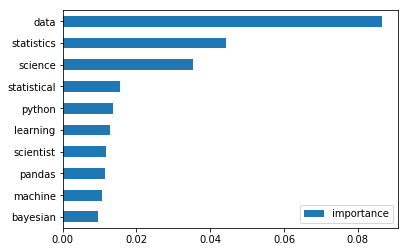

In [59]:
important[::-1].plot(kind='barh')

In [60]:
important_features = {k: v for k, v in zip(adj_cvec_df.columns, adj_randy.feature_importances_)}

df = pd.DataFrame(important_features, index=range(1))
df = df.T
df.columns = ['importance']
important = df.sort_values('importance', ascending=False).head(10)

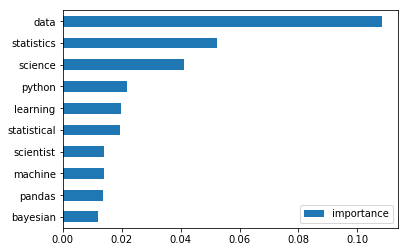

In [61]:
important[::-1].plot(kind='barh')

In [62]:
important_features = {k: v for k, v in zip(ng_cvec_df.columns, ng_randy.feature_importances_)}

df = pd.DataFrame(important_features, index=range(1))
df = df.T
df.columns = ['importance']
important = df.sort_values('importance', ascending=False).head(10)

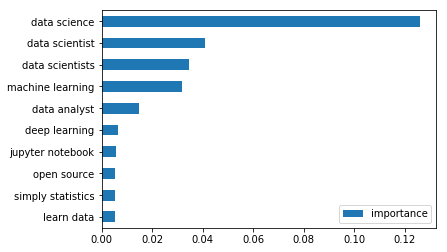

In [63]:
important[::-1].plot(kind='barh')

## Predicting Successful Posts for r/datascience

In [64]:
X = ds_df['title']
y = ds_df['good_com_score']

In [65]:
from sklearn.feature_extraction import stop_words
 
# print(stop_words.ENGLISH_STOP_WORDS)
custom_stopwords = list(stop_words.ENGLISH_STOP_WORDS)
custom_stopwords.extend(['data', 'science'])

## Count Vectorization

In [66]:
good_cvec = CountVectorizer(stop_words=custom_stopwords, max_features=1000)
good_data = good_cvec.fit_transform(X)
good_df = pd.DataFrame(good_data.toarray(), columns=good_cvec.get_feature_names())

In [67]:
good_X = good_df
X_train, X_test, y_train, y_test = train_test_split(good_X, y, random_state=42, stratify=y)

In [68]:
good_randy = RandomForestClassifier()
good_randy.fit(X_train, y_train)
good_randy.score(X_test, y_test)

0.568

In [69]:
important_features = {k: v for k, v in zip(good_df.columns, good_randy.feature_importances_)}

df = pd.DataFrame(important_features, index=range(1))
df = df.T
df.columns = ['importance']
important = df.sort_values('importance', ascending=False).head(10)

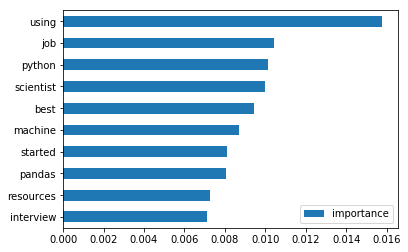

In [70]:
important[::-1].plot(kind='barh')

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.58

In [102]:
coef_df = pd.DataFrame(logreg.coef_, columns=good_df.columns, index=['coefs'])
coef_df.head()

,000,10,100,101,12,20,2016,2017,2018,25,...,www,xgboost,xkcd,xpost,year,years,york,young,youtube,zoo
coefs,0.678089,0.07769,0.254502,-0.193126,0.267104,0.085612,-0.640124,-0.133292,0.561213,-0.091608,...,-0.282733,-0.303592,0.717371,0.112254,-0.023665,-0.082688,-0.321219,0.0,-0.413742,0.308973


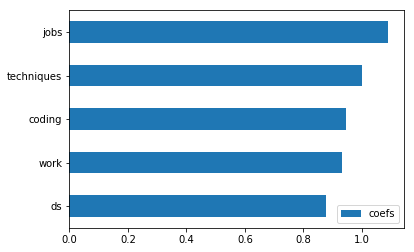

In [108]:
sorted_coefs = coef_df.T.sort_values('coefs', ascending=False)
sorted_coefs.head()[::-1].plot(kind='barh')

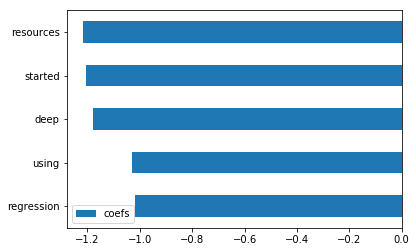

In [109]:
sorted_coefs.tail().plot(kind='barh')

## TF-IDF

In [114]:
good_tvec = TfidfVectorizer(stop_words=custom_stopwords, max_features=1000)
good_data = good_tvec.fit_transform(X)
good_df = pd.DataFrame(good_data.toarray(), columns=good_tvec.get_feature_names())

In [115]:
good_X = good_df
X_train, X_test, y_train, y_test = train_test_split(good_X, y, random_state=42, stratify=y)

In [116]:
good_randy = RandomForestClassifier()
good_randy.fit(X_train, y_train)
good_randy.score(X_test, y_test)

0.592

In [117]:
important_features = {k: v for k, v in zip(good_df.columns, good_randy.feature_importances_)}

df = pd.DataFrame(important_features, index=range(1))
df = df.T
df.columns = ['importance']
important = df.sort_values('importance', ascending=False).head(10)

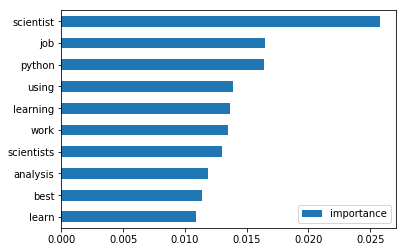

In [118]:
important[::-1].plot(kind='barh')

In [119]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.596

In [120]:
coef_df = pd.DataFrame(logreg.coef_, columns=good_df.columns, index=['coefs'])
coef_df.head()

,000,10,100,101,12,20,2016,2017,2018,25,...,www,xgboost,xkcd,xpost,year,years,york,young,youtube,zoo
coefs,0.601017,-0.079206,0.23575,-0.198939,0.08447,0.111174,-0.460439,-0.069416,0.475736,-0.070081,...,-0.246532,-0.284465,0.637581,0.111207,0.144956,0.013647,-0.200906,0.0,-0.415481,0.160949


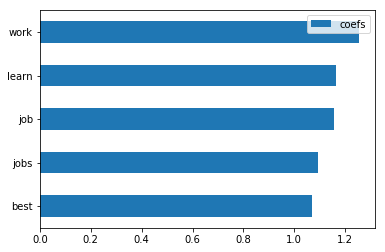

In [121]:
sorted_coefs = coef_df.T.sort_values('coefs', ascending=False)
sorted_coefs.head()[::-1].plot(kind='barh')

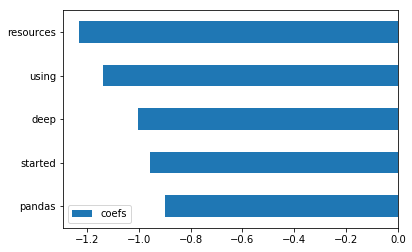

In [122]:
sorted_coefs.tail().plot(kind='barh')

## Testing Models on New Posts

The csv files titled "new...posts.csv" were collected with each subreddit sorted by new. We can apply our classification using this new information to see how well the random forest model performs when given new data.

In [71]:
new_stats_posts = pd.read_csv('new_statistics_posts.csv')
new_ds_posts = pd.read_csv('new_datascience_posts.csv')

new_stats_posts['target'] = 1
new_ds_posts['target'] = 0

In [72]:
new_df = pd.concat([new_stats_posts, new_ds_posts], sort=False)

In [73]:
new_X = new_df['title']
new_y = new_df['target']

In [74]:
new_data = cvec.transform(new_X)
new_cvec = pd.DataFrame(new_data.toarray(), columns=cvec.get_feature_names())
new_cvec_X = new_cvec

In [75]:
randy.score(new_cvec_X, new_y)

0.764859228362878

In [76]:
adj_new_data = adj_cvec.transform(new_X)
adj_new_cvec = pd.DataFrame(adj_new_data.toarray(), columns=adj_cvec.get_feature_names())
adj_new_X = adj_new_cvec

In [77]:
adj_randy.score(adj_new_X, new_y)

0.7502606882168926

In [78]:
ng_new_data = ng_cvec.transform(new_X)
ng_new_cvec = pd.DataFrame(ng_new_data.toarray(), columns=ng_cvec.get_feature_names())
ng_new_X = ng_new_cvec

In [79]:
ng_randy.score(ng_new_X, new_y)

0.6903023983315955